In [30]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [7]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [8]:
inputs.Age[:10]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [9]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [10]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [13]:
len(X_train)

712

In [14]:
len(X_test)

179

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
round(model.score(X_test,y_test),2)

0.76

In [20]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)

In [21]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 1.50
|   |--- feature_3 <= 26.27
|   |   |--- feature_2 <= 10.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  10.00
|   |   |   |--- feature_2 <= 32.50
|   |   |   |   |--- feature_2 <= 31.50
|   |   |   |   |   |--- feature_3 <= 19.38
|   |   |   |   |   |   |--- feature_3 <= 15.15
|   |   |   |   |   |   |   |--- feature_2 <= 17.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  17.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 29.35
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 28.75
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 7.24
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  7.24
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- feature_2 >  28.75
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   | 

In [37]:
# prompt: print the columns of X_train,y_train

print(X_train.columns)
y_train.name


Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')


'Survived'

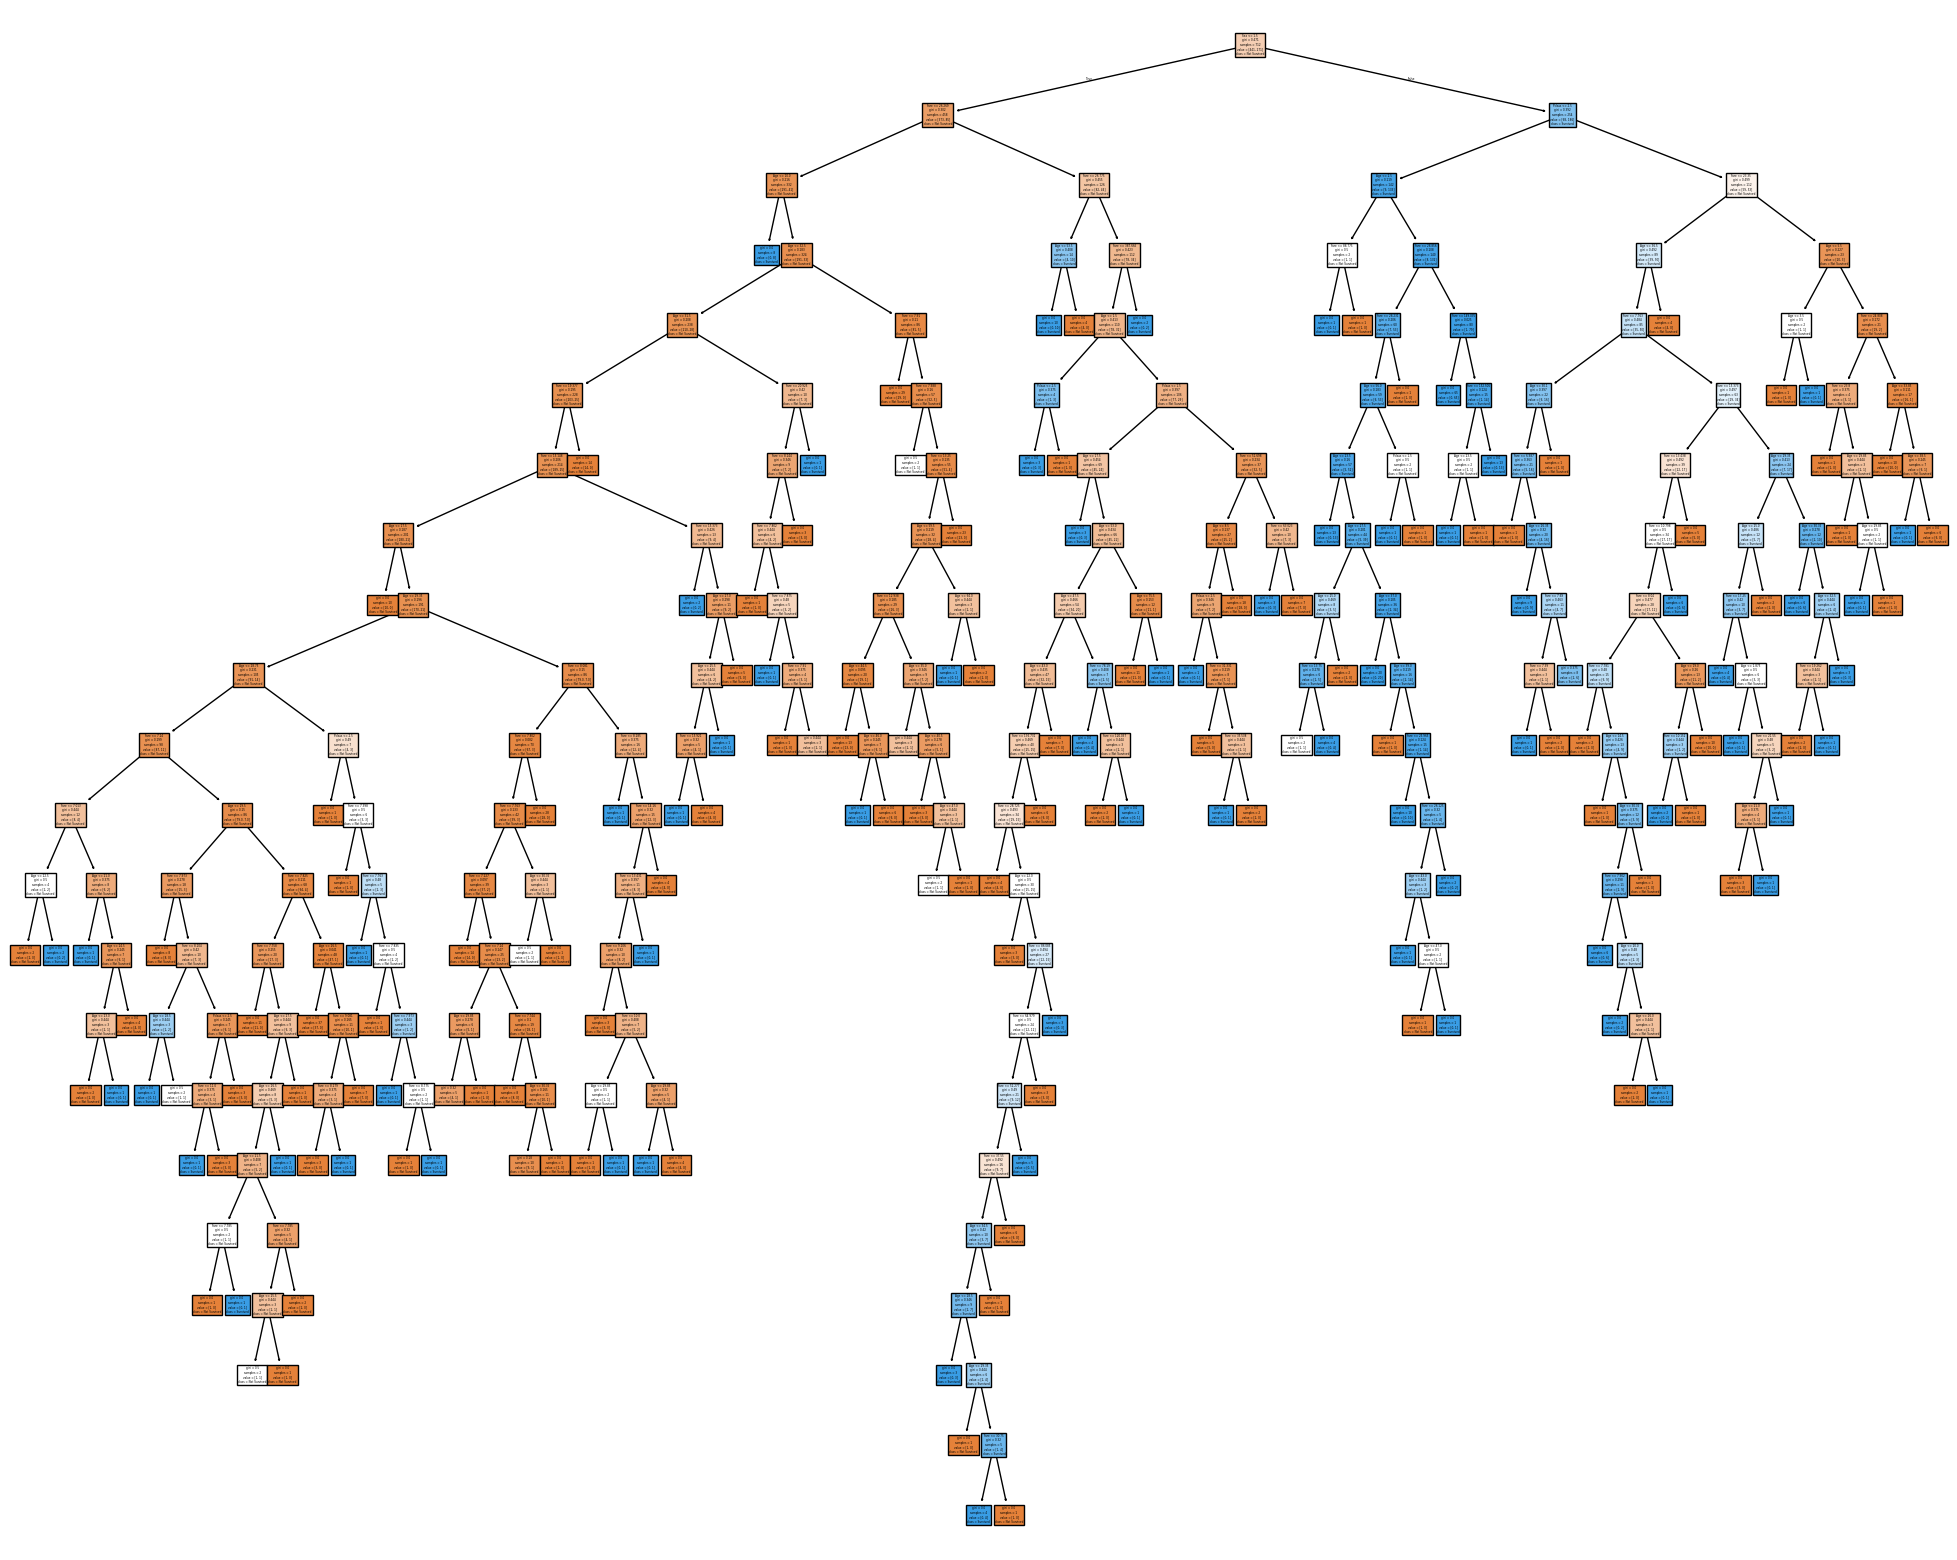

In [38]:
# prompt: visulazie the above decision tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=['Not Survived', 'Survived'],
                   filled=True)
plt.show()

In [31]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", round(metrics.accuracy_score(y_test, y_pred),2))


ACCURACY OF THE MODEL: 0.81


In [32]:
clf.predict([[3, 1, 22, 7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

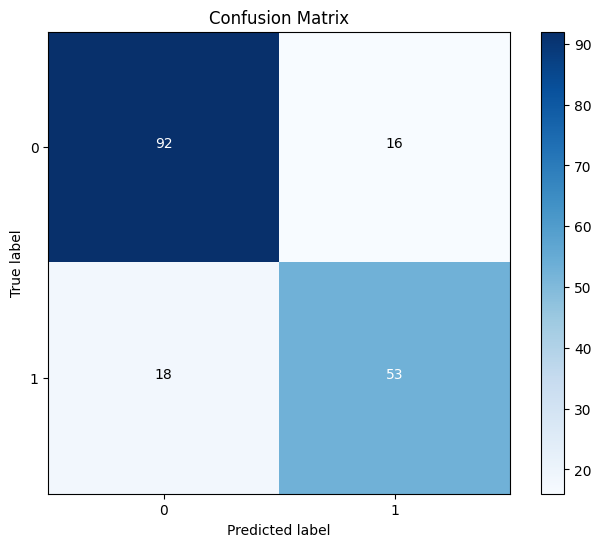

Accuracy= 0.81
Precision= 0.77
Recall= 0.75
F1 Score= 0.76


In [49]:
# prompt: plot confusision matrix along with labels and calculate accuracy, precision, sensitivity, f measure

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y_test) # Assuming binary classification (0 and 1)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Calculate metrics
print('Accuracy=',round(accuracy_score(y_test, y_pred),2))
print('Precision=',round(precision_score(y_test, y_pred),2))
print('Recall=',round(recall_score(y_test, y_pred),2))
print('F1 Score=',round(f1_score(y_test, y_pred),2))